In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def cnn_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [6]:
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.2225 - acc: 0.9366 - val_loss: 0.0793 - val_acc: 0.9749
Epoch 2/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.0713 - acc: 0.9786 - val_loss: 0.0455 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 270s 5ms/step - loss: 0.0513 - acc: 0.9842 - val_loss: 0.0450 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0417 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0326 - acc: 0.9898 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0327 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0356 - 

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12261204087482225343, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15367124574315269720
 physical_device_desc: "device: XLA_CPU device"]

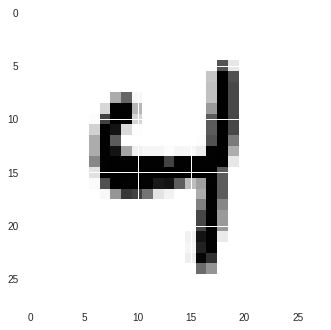

In [11]:
image_index = 1230
plt.imshow(X_test[image_index].reshape(28, 28), cmap='Greys')

In [17]:
# (batch, height, width, channels)
pred = model.predict(X_test[image_index].reshape(1, 1, 28, 28))
pred.argmax()

4